# Decision Trees

In dit notebook vind je 3 opdrachten.
- <a href="#dt_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding van het college.
- <a href="#dt_opdracht2"> Opdracht 2 </a> is optioneel, dit gaat je zeker helpen om decision trees beter te begrijpen, maar is voor dit college niet essentieel. (Het helpt je wel bij DEP, waar je zelf een decision tree gaat implementeren.)
- <a href="#dt_opdracht3"> Opdracht 3 </a> maken we in het college.

<a id ="dt_opdracht1"></a>
## Opdracht 1

We gaan aan de slag met data over woningen in New York  en San Francisco. Is op basis van de kenmerken van een woning te bepalen of deze in New York of San Francisco ligt?

We zullen eerst een voorbeeld geven - bestudeer deze goed. Daarna moet je zelf een decision tree trainen.

In [851]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Classificeer de huizen in onderstaande data set met een decision tree. In de kolom `in_sf` staat een 1 als het huis in San Fransisco staat en een 0 als het huis in New York staat.

In [852]:
homes = pd.read_csv('decision_trees_homes_ny_sf.csv', sep=",")
print(f"{len(homes)} meetwaarden, waarvan {homes.in_sf.sum()} in San Fransisco")
homes.head()

492 meetwaarden, waarvan 268 in San Fransisco


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


Een voorbeeld van een simpele beslisboom wordt hieronder gegeven.

1. Kies het modeltype

In [853]:
model = DecisionTreeClassifier()

2. Kies de features en targetvariabele

In [854]:
feat_names = ['beds', 'bath']
cat_names = ['San Francisco', 'New York']
feats = np.array(homes[feat_names])
cat = homes['in_sf']

3. Maak een train- en testset

In [855]:
feats_train, feats_test, cat_train, cat_test = train_test_split(feats, cat, random_state=10)
print("{} elementen in de trainset en {} elementen in de testset".format(len(cat_train), len(feats_test)))

369 elementen in de trainset en 123 elementen in de testset


4. Train het model

In [856]:
model.fit(feats_train, cat_train)

DecisionTreeClassifier()

5. Evalueer de resultaten

In [857]:
# M.b.v. de score wordt de accuracy berekend: het percentage voorspellingen dat correct
model.score(feats_test, cat_test)

0.7642276422764228

In [858]:
# Alternatieve manier om de voorspellende waarde te berekenen is door het model de klasse te voorspellen voor
# de testset van de features en deze te vergelijken met de testset van de klassen.
cat_model = model.predict(feats_test)
accuracy_score(cat_test, cat_model)

0.7642276422764228

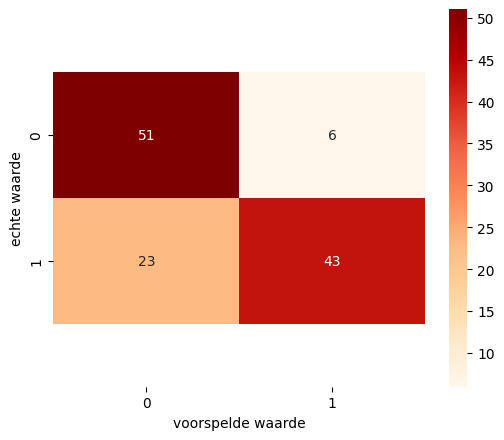

In [859]:
# Het is ook interessant om te kijken welke voorspellingen goed gaan en welke niet gaan. 
# Je ziet dat vooral de NY-huizen niet goed voorspeld worden. Dus het is zaak om onderscheidende features toe te voegen.

import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(cat_test, cat_model)

# Maak van de array een pandas dataframe om te visualiseren
df_cm = pd.DataFrame(cm)

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True, cmap='OrRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

Visualisatie van de decision tree met GraphViz.

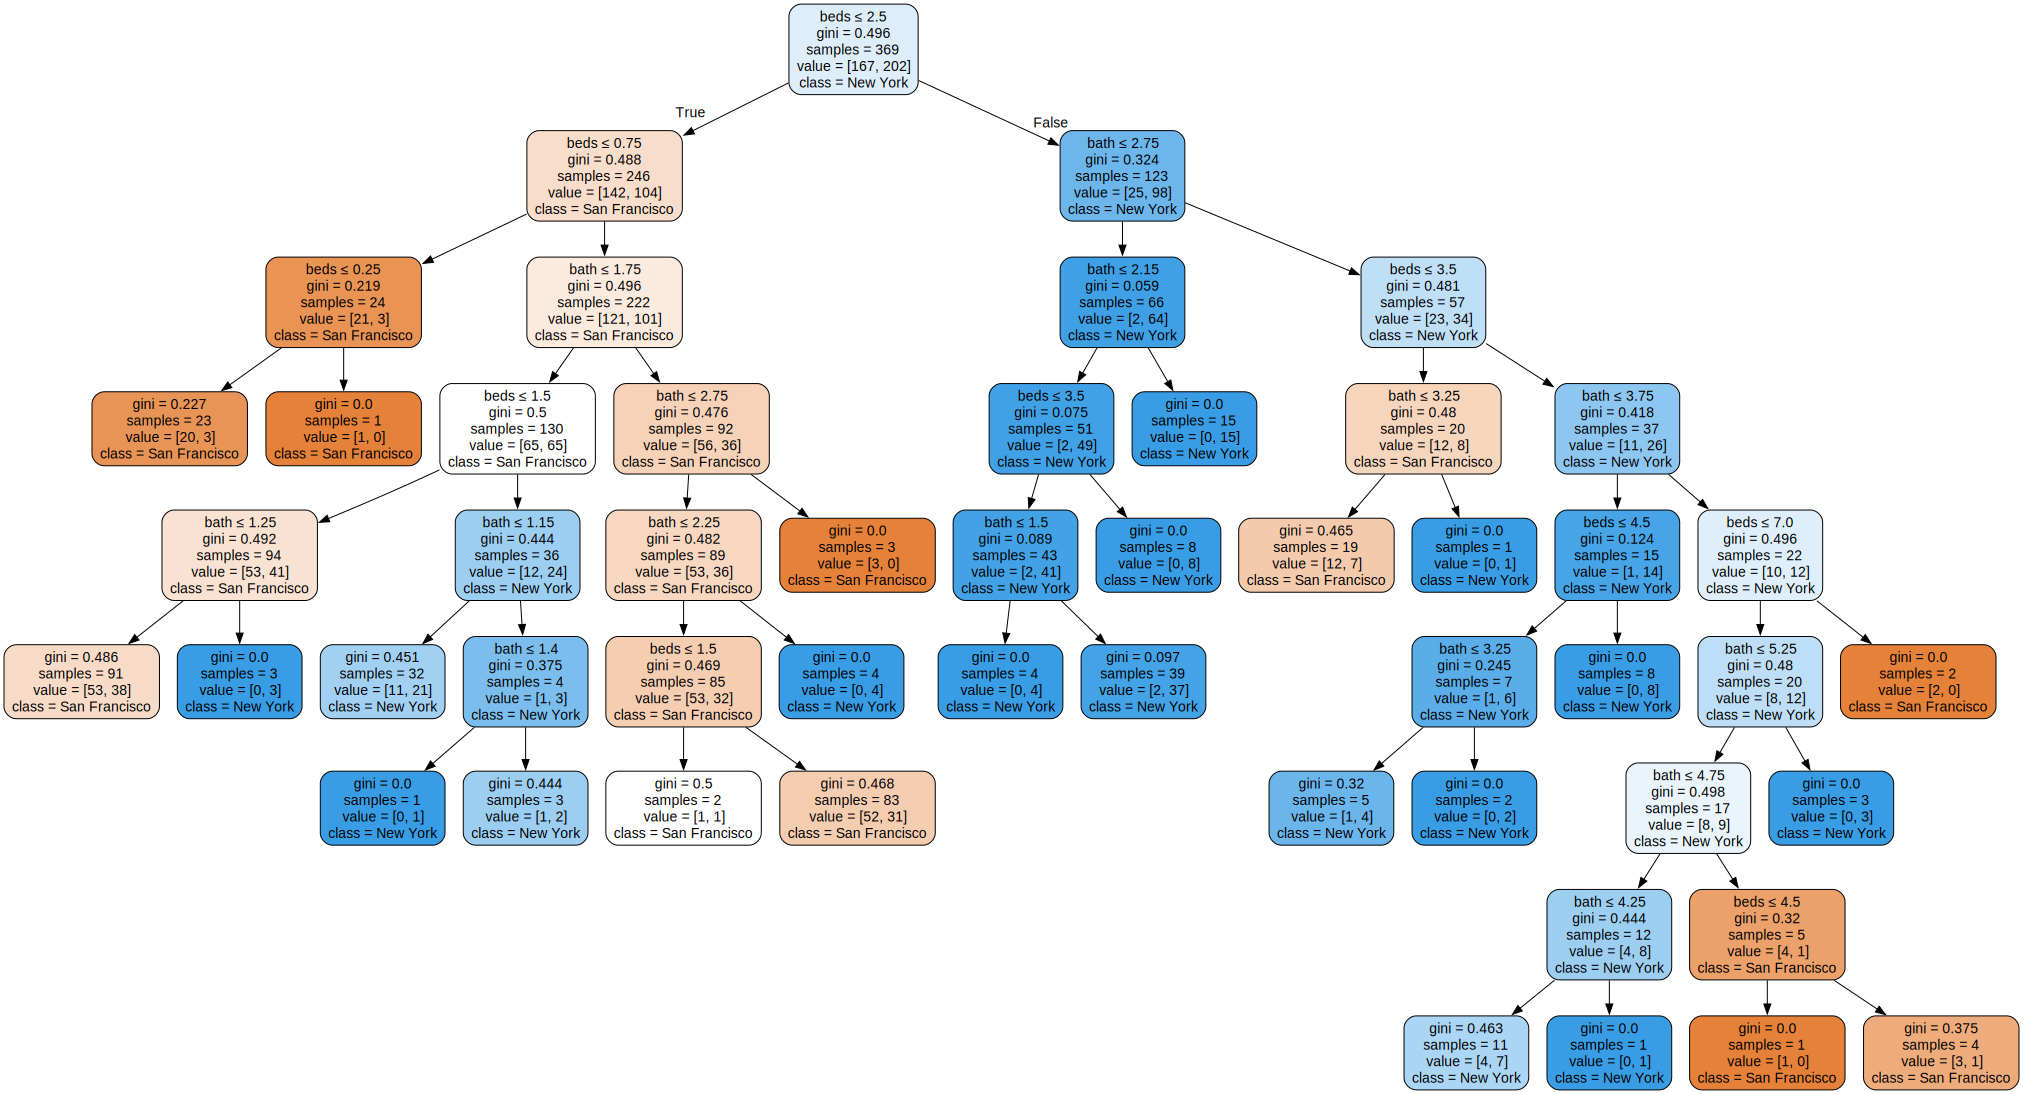

In [860]:
data = export_graphviz(model, out_file=None, feature_names=feat_names, class_names=cat_names,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

Maak nu zelf een betere beslisboom. Het is dus de bedoeling om een hogere accuracy te krijgen! 

Denk aan het toevoegen van features, aanpassen van hyperparameters, etc.

Selecteer de _features_ en de target _classes_.

In [861]:
feat = homes.loc[:, homes.columns != 'in_sf']
cat = homes['in_sf']

Opdelen in een train- en een testset.

In [862]:
X_train, X_test, y_train, y_test = train_test_split(feat, cat, random_state=10)
print(f"X_train has a size of {X_train.shape[0]}, which is {X_train.shape[0] / homes.shape[0] * 100}%.")
print(f"X_test has a size of {X_test.shape[0]}, which is {X_test.shape[0] / homes.shape[0] * 100}%.")

X_train has a size of 369, which is 75.0%.
X_test has a size of 123, which is 25.0%.


Maak een _decision tree_ model, train deze en bereken de voorspellende waarde.

In [863]:
model = DecisionTreeClassifier(criterion = 'entropy')

Visualisatie van de decision tree met GraphViz.

In [864]:
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8943089430894309

Bepaal de invloed van het aantal lagen van de boom op de voorspellingsscore.

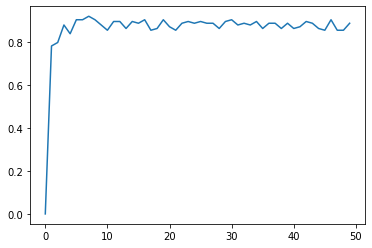

Best depth: 7 with score: 91.869918699187%


In [865]:
d = np.zeros(50)
score = np.zeros(len(d))
best_score = 0
best_depth = 0

for x in range(1, len(d)):
    model = DecisionTreeClassifier(max_depth=x)
    model.fit(X_train, y_train)
    d[x] = x
    score[x] = accuracy_score(y_test, model.predict(X_test))
    if accuracy_score(y_test, model.predict(X_test)) > best_score:
        best_score = accuracy_score(y_test, model.predict(X_test))
        best_depth = x

plt.plot(d, score)
plt.show()
print(f'Best depth: {best_depth} with score: {best_score*100}%')

<a id = "dt_opdracht2"></a>
## Opdracht 2

In dit notebook wordt het onderliggende zelflerende algoritme van decision trees uitgelegd. Dit is gebaseerd op entropie. Je kunt in dit notebook zelf spelen met de werking van entropie om zo een beter gevoel te krijgen voor de werking van decision trees.

In [866]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import scipy.stats as st

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [867]:
weer = pd.DataFrame({'weertype': ['slecht', 'slecht', 'slecht', 'medium', 'mooi', 'medium', 'mooi'],
                     'weerklasse': [0, 0, 0, 1, 2, 1, 2],
                     'temperatuur': [3, 18, 32, 36, 19, 7, -10], 
                     'regen': [True, True, True, False, False, False, False]})

Entropie $E(S)$:

$$E(S) = -\sum_{i=1}^{c}p_{i}\log_{2}(p_{i})$$

Als er twee klassen zijn (dus $c = 2$ mogelijke waarden voor doelvariabele $S$), dan ligt de waarde van de entropie tussen de 0 (alles behoort tot één klasse) en 1 (meetwaarden zijn precies verdeeld over de twee klassen).

NB. Als je het aandeel $p_1$ van de eerste klasse $c_1$ weet, dan weet je ook het aandeel $p_2 = 1 - p_1$ van de tweede klasse $c_2$. Bij méér dan twee klassen gaat dit natuurlijk niet meer op.

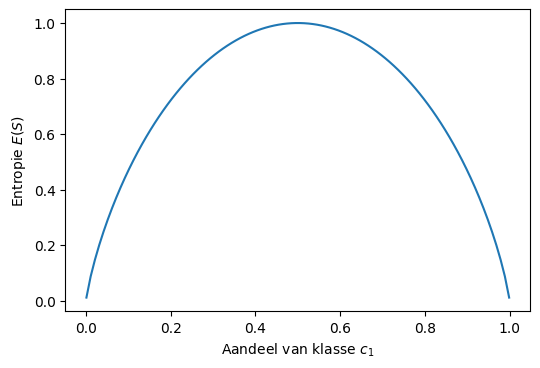

In [868]:
fig, ax = plt.subplots(1, dpi=100)

x = np.linspace(.001,.999,100)
y = -x * np.log2(x) + -(1-x) * np.log2(1-x)
ax.set_xlabel(r"Aandeel van klasse $c_1$")
ax.set_ylabel(r"Entropie $E(S)$")

plt.plot(x,y)
plt.show()

Bepaal met bovenstaande formule de entropie van doelvariabele `weertype`.

In [869]:
weer

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
2,slecht,0,32,True
3,medium,1,36,False
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [870]:
# Entropie voor weertype [slecht, medium, mooi]
# Berekening 1
E_weertype = - ((3/7) * np.log2(3/7) + (2/7) * np.log2(2/7) + (2/7) * np.log2(2/7))
E_weertype

1.5566567074628228

In [871]:
# Berekening 2
st.entropy([3,2,2], base=2)

1.556656707462823

In [872]:
# Berekening 3
st.entropy(weer.groupby('weertype').count()['weerklasse'], base=2)

1.556656707462823

### Split 1. Regen of temperatuur?

Bereken de entropie en information gain bij een split op `regen`.

In [873]:
weer_regen_false = weer[weer['regen'] == False]
weer_regen_false

,weertype,weerklasse,temperatuur,regen
3,medium,1,36,False
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [874]:
st.entropy([0, 2, 2], base=2)

1.0

In [875]:
weer_regen_true = weer[weer['regen'] == True]
weer_regen_true

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
2,slecht,0,32,True


In [876]:
st.entropy([3, 0, 0], base=2)

0.0

In [877]:
E_split1_regen = 3/7*st.entropy([3,0,0], base=2) + 4/7*st.entropy([0,2,2], base=2)

gain_split1_regen = E_weertype - E_split1_regen

print(f"Entropie na een split op regen: {E_split1_regen:.2f}")
print(f"Information gain bij een split op regen: {gain_split1_regen:.2f}")

Entropie na een split op regen: 0.57
Information gain bij een split op regen: 0.99


We kunnen ook splitten op `temperatuur` op veel verschillende manieren. Bereken alleen de entropie en de information gain bij een split op `temperatuur` bij 20 graden.

In [878]:
weer_tempratuur_twintig_minder = weer[weer['temperatuur'] <= 20]
weer_tempratuur_twintig_meer = weer[weer['temperatuur'] > 20]

In [879]:
weer_tempratuur_twintig_minder

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [880]:
st.entropy([2, 1, 2], base=2)

1.5219280948873626

In [881]:
weer_tempratuur_twintig_meer

,weertype,weerklasse,temperatuur,regen
2,slecht,0,32,True
3,medium,1,36,False


In [882]:
st.entropy([1, 1, 0], base=2)

1.0

In [883]:
E_split1_tempratuur = 5/7*st.entropy([2,1,2], base=2) + 2/7*st.entropy([1,1,0], base=2)

gain_split1_tempratuur = E_weertype - E_split1_tempratuur

print(f"Entropie na een split minder dan 20 graden: {E_split1_tempratuur:.2f}")
print(f"Information gain bij een split op meer dan 20 graden: {gain_split1_tempratuur:.2f}")

Entropie na een split minder dan 20 graden: 1.37
Information gain bij een split op meer dan 20 graden: 0.18


Welke split is het beste?

De split op regen want de information gain is hoger.

### Split 2. Welke temperatuur?

Bereken ná een split op `regen` (dus als tweede laag) de entropie bij een split op `temperatuur` met de scheiding bij $t = 0$, $t = 10$ en $t = 20$ graden.

Welke split is het beste?

### Decision Tree

Maak de decision tree met `DecisionTreeClassifier`. Kies als parameter `criterion='entropy'`.

In [884]:
labels = dict(zip(weer['weerklasse'].unique(), weer['weertype'].unique()))
labels

{0: 'slecht', 1: 'medium', 2: 'mooi'}

In [885]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(weer[['regen', 'temperatuur']], weer['weerklasse'])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Visualisatie van de decision tree met GraphViz.

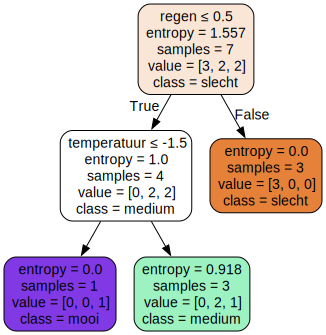

In [886]:
data = export_graphviz(model, out_file=None, feature_names=['regen', 'temperatuur'], class_names=labels,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

<a id="dt_opdracht3"></a>
## Opdracht 3 - German Credit Data

Voor deze oefening kijken we naar de data set 'german'. Deze data set bevat gegevens van een Duitse bank over mensen die een lening aanvragen. De vraag is of de bank ze deze lening wil verstrekken. Dat doet de bank alleen als er een grote kans is dat mensen de lening kunnen terugbetalen. Wij gaan hiervoor een beslisboom algoritme bouwen.

#### Initialisatie
In de cell hieronder zetten we alle statements die packages inladen netjes bij elkaar. In de loop van het college zullen we hier nog een en ander aan toe moeten voegen.

In [887]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Data understanding
We gaan nu kijken naar de data set 'german.data'. De data staat op Canvas. Daar staat ook het data dictionary van de data set: hierin wordt uitgelegd wat de betekenis is van alle attributen.

Lees de data set in, bekijk de data set en krijg een eerste gevoel bij deze data. Zorg dat je in ieder geval de volgende zaken helder hebt:
- Wat zijn de meetniveau's van alle attributen?
- Zijn er attributen met *rare* waardes?

In [888]:
german = pd.read_csv('german.data', sep = ' ', quotechar = "'")

In [889]:
pd.set_option('display.max_columns', None)
german.head()

,Euros op rekening,Duur Lening,Leengeschiedenis,Doel vd Lening,Bedrag Lening,Bedrag op spaarrekening,Duur huidige baan,lening als perc van inkomen,persoonlijke status,overige schuldeisers,huidige woning sinds,eigendom,leeftijd,andere leningen,huisvesting,aantal leningen,baan,verantwoordelijk voor,telefoon,buitenlandse werknemer,lening terugbetaald
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,2


Maak nu een boxplot van de leeftijd. Merk op dat standaard toepassen van plt.boxplot niet lukt als gevolg van de missende waarden in de data. Hoe kunnen we nu wel zo'n boxplot krijgen?

Trek ook conclusies over eventuele uitschieters en of we *iets* moeten doen met die uitschieters.

<AxesSubplot:>

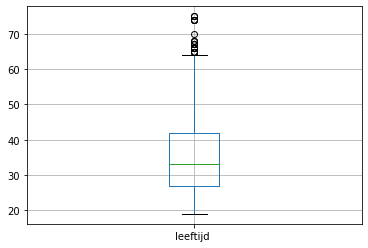

In [890]:
german.boxplot('leeftijd ')

er zijn uitschieters, dit zijn niet grote uitschieters waardoor ze niet verwijdert te hoeven worden.

We gaan straks proberen een beslisboom te maken die voorspeld aan wie de bank zonder veel risico een lening kan verstrekken op basis van deze data. Probeer de target feature te vinden en maak een staafdiagram ('bar chart') voor deze feature. In dit staafdiagram moet je duidelijk kunnen aflezen hoe vaak de target feature welke waarde aanneemt. 

In [891]:
german.columns

Index(['Euros op rekening', ' Duur Lening ', 'Leengeschiedenis',
       'Doel vd Lening ', ' Bedrag Lening', 'Bedrag op spaarrekening',
       'Duur huidige baan', 'lening als perc van inkomen ',
       'persoonlijke status', 'overige schuldeisers', 'huidige woning sinds ',
       'eigendom', 'leeftijd ', 'andere leningen', 'huisvesting',
       'aantal leningen', 'baan', 'verantwoordelijk voor ', 'telefoon',
       'buitenlandse werknemer', 'lening terugbetaald'],
      dtype='object')

Text(0.5, 0, 'lening terugbetaald')

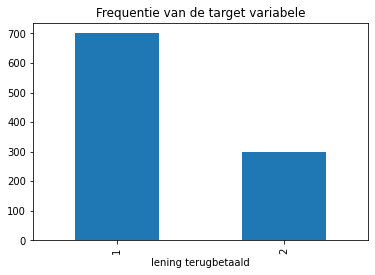

In [892]:
ax = german['lening terugbetaald'].value_counts().plot(kind = 'bar')
ax.set_title('Frequentie van de target variabele')
ax.set_xlabel('lening terugbetaald')

### Data preparation
We gaan de dataset nu klaarstomen voor een decision tree met behulp van een aantal opschoningsacties.

Niet alleen de waardes van een attribuut kunnen *rotzooi* bevatten, ook de attribuutnamen ofwel kolomnamen. Als er spaties in de kolomnaam staan, dan kun je niet meer gebruik maken van de dot-notatie van pandas. Kijk bijvoorbeeld maar eens naar het attribuut *leeftijd*. Bij opdracht 2. heb je waarschijnlijk al gemerkt dat de kolomnaam eigenlijk 'leeftijd ' is met een extra spatie die daar op een of andere manier ingekomen is. Waarschijnlijk bij het exporteren van een Excelsheet naar een CSV bestand... 

Anyway, dit spatie moet weg! Je kunt bijvoorbeeld niet de kolom leeftijd selecteren door german.leeftijd. Wat wel altijd werkt is het selecteren van kolommen door middel van de brackets [], bijvoorbeeld german['leeftijd ']. Maar stel dat we nu gewoon de kolomnaam van leeftijd willen hernoemen en de spatie weghalen, hoe kunnen we dit doen?

In [893]:
german.rename(columns={'leeftijd ': 'leeftijd'}, inplace=True)

In [894]:
german['leeftijd']

0      67.0
1      22.0
2      49.0
3      45.0
4      53.0
       ... 
995    31.0
996    40.0
997    38.0
998    23.0
999    27.0
Name: leeftijd, Length: 1000, dtype: float64


De laatste stap voordat we kunnen gaan modelleren is het selecteren van de juiste features. Ten eerste moeten we ons afvragen of het **ethisch verantwoord** om het attribuut te gebruiken. Maak een selectie van de attributen die wel geschikt zijn en licht toe waarom je bepaalde attributen niet geschikt vindt.

In [895]:
features = german.copy()
features.drop(['persoonlijke status', 'buitenlandse werknemer'], axis=1)

,Euros op rekening,Duur Lening,Leengeschiedenis,Doel vd Lening,Bedrag Lening,Bedrag op spaarrekening,Duur huidige baan,lening als perc van inkomen,overige schuldeisers,huidige woning sinds,eigendom,leeftijd,andere leningen,huisvesting,aantal leningen,baan,verantwoordelijk voor,telefoon,lening terugbetaald
0,A11,6,A34,A43,1169,A65,A75,4,A101,4,A121,67.0,A143,A152,2,A173,1,A192,1
1,A12,48,A32,A43,5951,A61,A73,2,A101,2,A121,22.0,A143,A152,1,A173,1,A191,2
2,A14,12,A34,A46,2096,A61,A74,2,A101,3,A121,49.0,A143,A152,1,A172,2,A191,1
3,A11,42,A32,A42,7882,A61,A74,2,A103,4,A122,45.0,A143,A153,1,A173,2,A191,1
4,A11,24,A33,A40,4870,A61,A73,3,A101,4,A124,53.0,A143,A153,2,A173,2,A191,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A101,4,A121,31.0,A143,A152,1,A172,1,A191,1
996,A11,30,A32,A41,3857,A61,A73,4,A101,4,A122,40.0,A143,A152,1,A174,1,A192,1
997,A14,12,A32,A43,804,A61,A75,4,A101,4,A123,38.0,A143,A152,1,A173,1,A191,1
998,A11,45,A32,A43,1845,A61,A73,4,A101,4,A124,23.0,A143,A153,1,A173,1,A192,2



Ten tweede moeten we kijken naar het meetniveau van de attributen: niet alle meetniveau's zijn geschikt voor een beslisboom. Het Decision Tree algoritme van sci-kit learn kan alleen kwantitatieve features aan als input en kan ook niet omgaan met missende waarden. Een mogelijke oplossing is om de rijen met missende waarden weg te laten en de kwalitatieve features om te zetten met behulp van get_dummies.

Merk op: hoewel deze oplossing niet optimaal is voor wat betreft de performance, zullen we hier nu voor kiezen. Alternatieven zijn om de beslisboom te maken in R (waar wel een standaardimplementatie is die overweg kan met categoriale features en missings) of te kiezen voor een ander python package. Voor dit laatste zijn er verschillende mogelijkheden onder andere: CatBoost, LightGBM, of H2O, maar elk ook weer met hun eigen nadelen. Zo kan CatBoost bijvoorbeeld  alleen symmetrische decision trees leren en is de visualisatie van een boom niet begrijpelijk. 

In [896]:
cat = np.where(features.dtypes == 'object')[0]
cat

array([ 0,  2,  3,  5,  6,  8,  9, 11, 13, 14, 16, 18, 19], dtype=int64)

In [897]:
features.dropna(inplace=True)
features = pd.get_dummies(features)
features

,Duur Lening,Bedrag Lening,lening als perc van inkomen,huidige woning sinds,leeftijd,aantal leningen,verantwoordelijk voor,lening terugbetaald,Euros op rekening_A11,Euros op rekening_A12,Euros op rekening_A13,Euros op rekening_A14,Leengeschiedenis_A30,Leengeschiedenis_A31,Leengeschiedenis_A32,Leengeschiedenis_A33,Leengeschiedenis_A34,Doel vd Lening _A40,Doel vd Lening _A41,Doel vd Lening _A410,Doel vd Lening _A42,Doel vd Lening _A43,Doel vd Lening _A44,Doel vd Lening _A45,Doel vd Lening _A46,Doel vd Lening _A48,Doel vd Lening _A49,Bedrag op spaarrekening_A61,Bedrag op spaarrekening_A62,Bedrag op spaarrekening_A63,Bedrag op spaarrekening_A64,Bedrag op spaarrekening_A65,Duur huidige baan_A71,Duur huidige baan_A72,Duur huidige baan_A73,Duur huidige baan_A74,Duur huidige baan_A75,persoonlijke status_A91,persoonlijke status_A92,persoonlijke status_A93,persoonlijke status_A94,overige schuldeisers_A101,overige schuldeisers_A102,overige schuldeisers_A103,eigendom_A121,eigendom_A122,eigendom_A123,eigendom_A124,andere leningen_A141,andere leningen_A142,andere leningen_A143,huisvesting_A151,huisvesting_A152,huisvesting_A153,baan_A171,baan_A172,baan_A173,baan_A174,telefoon_A191,telefoon_A192,buitenlandse werknemer_A201,buitenlandse werknemer_A202
0,6,1169,4,4,67.0,2,1,1,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False
1,48,5951,2,2,22.0,1,1,2,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False
2,12,2096,2,3,49.0,1,2,1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False
3,42,7882,2,4,45.0,1,2,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False
4,24,4870,3,4,53.0,2,2,2,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31.0,1,1,1,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False
996,30,3857,4,4,40.0,1,1,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,True,False
997,12,804,4,4,38.0,1,1,1,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,T

### Modelling
De dataset is klaar voor het decision tree algoritme.

Doorloop de bekende stappen om tot een beslisboom komen. Bepaal de kwaliteit van de beslisboom met de juiste metrics. Pas de hyperparameters aan om tot een zo hoog mogelijke score te komen.

In [901]:
max_depth = 30
depths = range(max_depth)
min_leaf = [5,10,25,50,]
min_split = [5,10,25,50]

best_score = 0
best_depth = 0
best_leaf = 0
best_split = 0

X_train, X_test, y_train, y_test = train_test_split(features.drop(['lening terugbetaald'], axis=1), features['lening terugbetaald'], random_state=0)

for depth in range(1, max_depth):
    for leaf in min_leaf:
        for split in min_split:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, min_samples_split=split)
            model.fit(X_train, y_train)
            if accuracy_score(y_test, model.predict(X_test))*100 > best_score:
                best_score = accuracy_score(y_test, model.predict(X_test))*100
                best_depth = depth
                best_leaf = leaf
                best_split = split
                
print(f'De beste score is: {best_score} met de hyperparameters: best_depth: {best_depth}, best_leaf: {best_leaf} en best_split:{best_split}.')

71.2
De beste score is: 74.8 met de hyperparameters: best_depth: 3, best_leaf: 5 en best_split:5.


Beargumenteer of de hoogst gevonden accuracy *goed* is of niet.

In [902]:
val_cnt = y_test.value_counts()
baseline = val_cnt.iloc[0]/val_cnt.sum()
print(baseline*100)

71.2


Vergeleken met de base line is het model maar een kleine verbetering. De baseline die voorspeld dat alle personen hun lening terug betalen heeft het 71.2% van de tijd goed en het model heeft het 74.8% van de tijd goed.

Visualiseer tenslotte deze beslisboom. Is deze in de praktijk te gebruiken in een oplossing / applicatie? En is deze uit te leggen aan de *business* of klant?

In [903]:
model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)

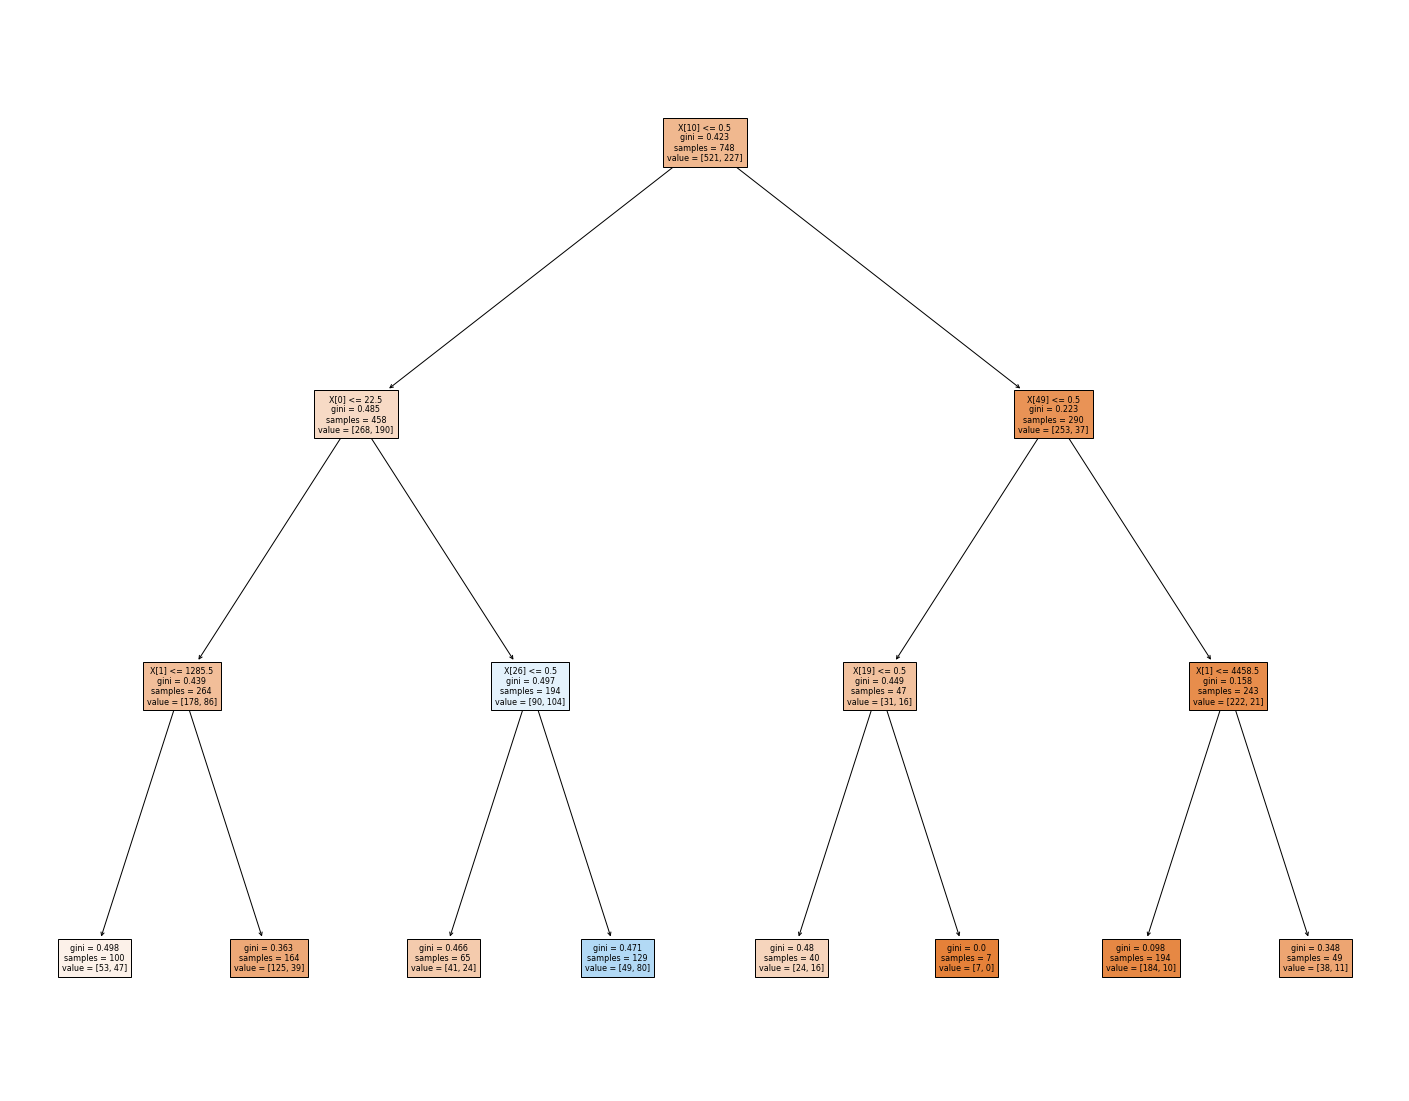

In [904]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True, fontsize = 8)